# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №3

## №1 (40 баллов)

In [140]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv('HW_003_001.txt')

In [12]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [14]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

y = df['Churn'].astype('int').values
X = df.drop('Churn', axis=1).values

- Ваше задание
    - Провести EDA анализ признаков, которые есть
    - Подумать над feature engineering, сформировать гипотезы
    - Зафиттить логистическую модель и пробит модель
    - Посмотреть на их метрики качества: псевдо $R^2$, confusion matrix, precision, recall, F1-score, ROC AUC
    - Какую модель вы бы выбрали?
    - Посмотреть на профиль среднего "клиента" (наблюдения). Какие переменные надо изменить, чтобы верояность ухода клиента снизилась?
    - Перейдем к предсказаниям:
        - У вас не всегда будут функции типа `LogisticRegressionCV`, поэтому почитайте про [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
        - Подумайте, какие еще признаки можно добавить в вашу модель. На этом этапе не бойтесь кол-ва признаков, чем больше, тем лучше. *{Дополнительно: почитайте про [`RFECV`](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py), попробуйте его применить}*
        - При наличии достаточного кол-ва наблюдений, хорошей стратегией является использование только части данных для расчета модели. Используя [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) выделите наблюдения для обучения.
        - Создайте стратифицированные фолды на обучающей выборке
        - На практике нам приходится выбирать между различными метриками качества. В этой задаче будем использовать ROC AUC
        - Используя `GridSearchCV` и [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) подберите оптимальный гиперпараметр для l1, l2 регуляризаций. Помните, что вы хотите, чтобы оптимальный гиперпараметр был выбран согласно метрике ROC AUC. Почитайте, как это сделать в GridSearchCV
        - Нарисуйте графики, как меняется ваш score в зависимости от значения гиперпараметра

Посмотрим на количественные переменные (то что пропущенных переменных нет ясно еще ячейке с инфо)

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
International plan,3333.0,0.096910,0.295879,0.00,0.00,0.00,0.00,1.00
Voice mail plan,3333.0,0.276628,0.447398,0.00,0.00,0.00,1.00,1.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00


Вообще не очень удобно работать с датасетом без какого-то описания, но, уже погуглив, я сделаю wild guess и буду считать, что данные описывают, закрыл ли клиент подписку и оттёк или нет, в зависимости от его тарифного плана, количества минут, которые он тратил и так далее.

Посмотрим на корреляции признаков

/tmp/ipykernel_4192/357754966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

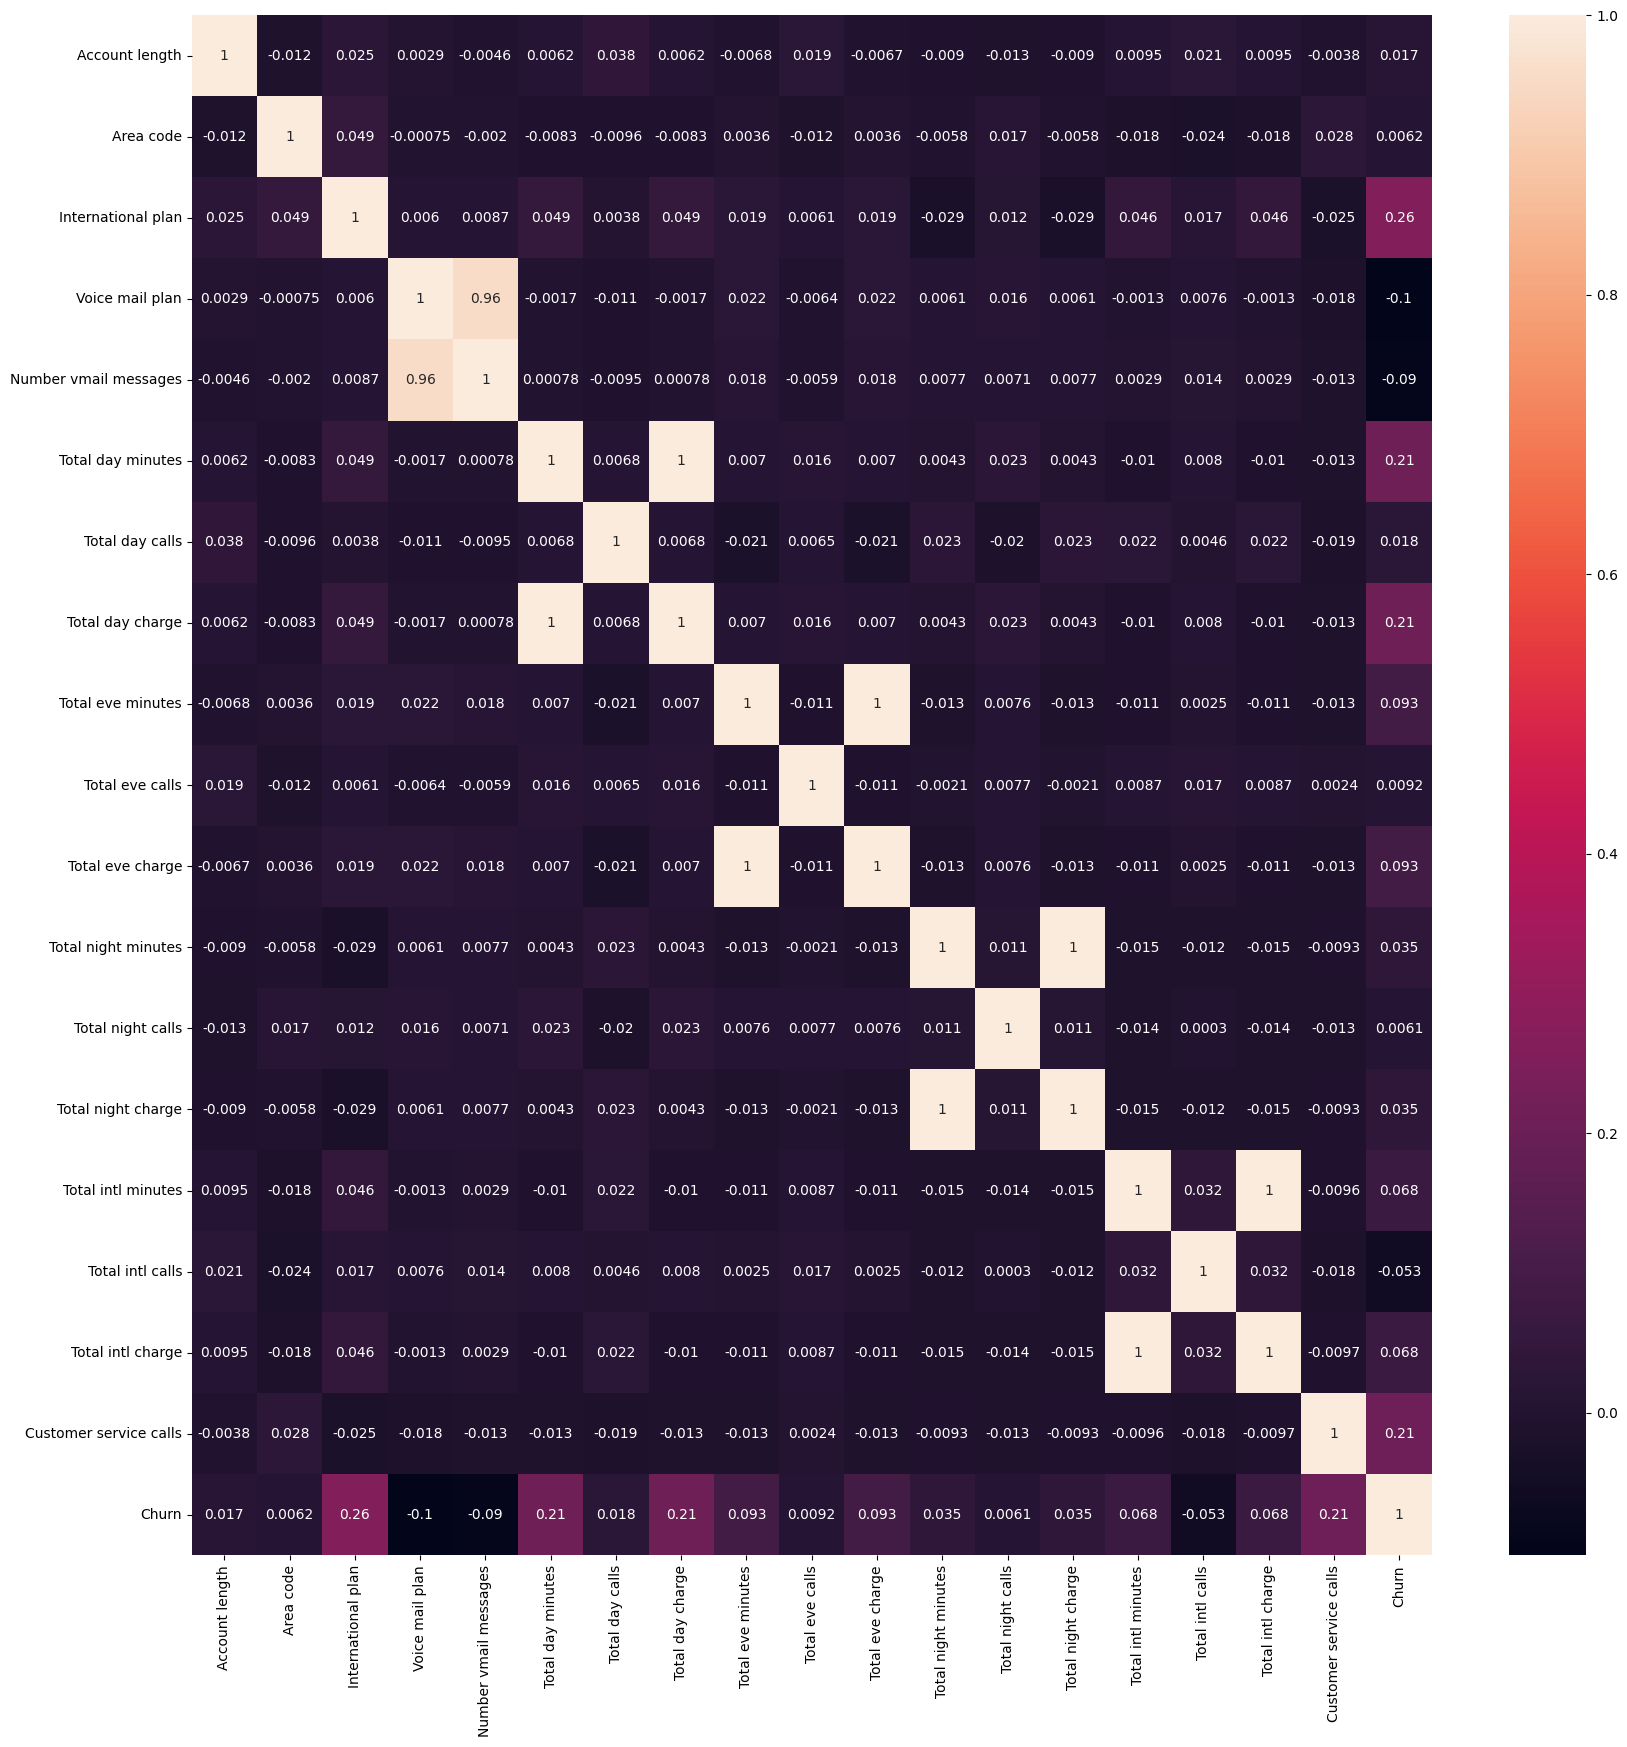

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

Довольно закономерно, что есть группы признаков, обладающих полной корреляцией: сумма за ночные звонки скорее всего линейно зависит от их продолжительности; аналогично и для дневных звонков.  Также количество сообщений в голосовой почте полностью зависит от того, была ли она вообще подключена или же нет.

Однако удивительно, что количество вечерних и дневних звоноков не связано: я думала, что должен быть какой-то поведенческий паттерн и те пользователи, которые много говорят по телефону, будут много по нему говорить в любое время. 

Судя по корреляционной матрице, на целевую переменную наиболее существенное влияние оказывают наличие международного плана, сумма, потраченная на дневные звонки (равносильно продолжительности дневных звонков) и количество звоноков в поддержку. Причем всё это, судя по корреляционной матрице, положительно влияет на отток.

Посмотрим на то, сколько вообще людей оттекает

In [27]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [23]:
df["Churn"].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

Получается, что отказалось от подписки примерно 15% пользователей. Это не мало.

Посмотрим на распределение дополнительных опций (международных звонков и голосовой почты) и оттока

In [55]:
df['Churn'] = df['Churn'].astype('int64')

In [38]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,0,1
Churn,,
False,2664,186
True,346,137


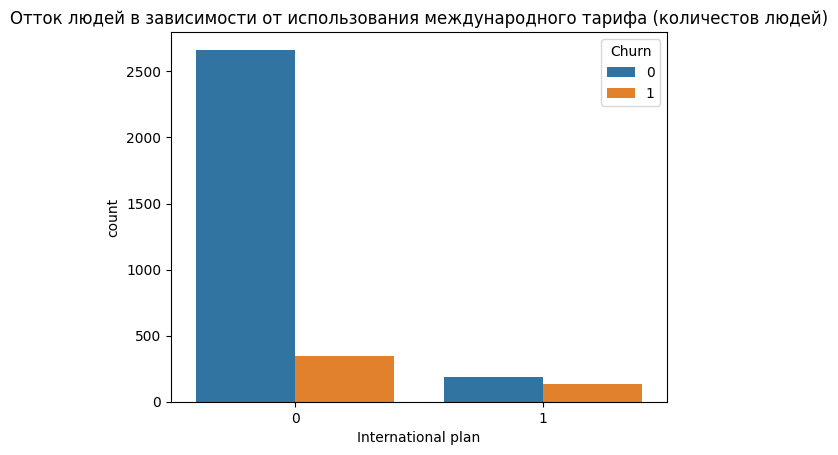

In [68]:
sns.countplot(x=df["International plan"], hue=df["Churn"])
plt.title("Отток людей в зависимости от использования международного тарифа (количество людей)")
plt.show()

In [39]:
pd.crosstab(df['Churn'], df['Voice mail plan'])

Voice mail plan,0,1
Churn,,
False,2008,842
True,403,80


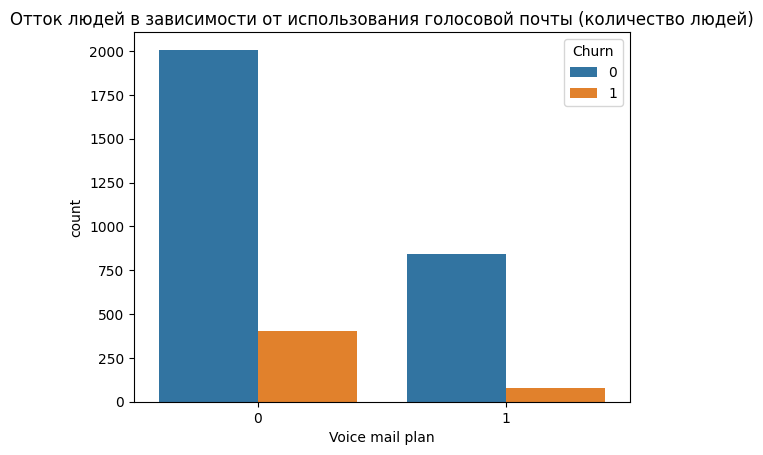

In [70]:
sns.countplot(x=df["Voice mail plan"], hue=df["Churn"])
plt.title("Отток людей в зависимости от использования голосовой почты (количество людей)")

plt.show()

На мой взгляд, по международным звонкам ничего определенного сказать нельзя, зато только 80 человек из оттекших 483 пользовались голосовой почтой. 842 человека из тех, кто ее использовал, не оттекли. Мне кажется, этот признак обладает какой-то объясняющей силой и вероятно я его включу в модель

Посмотрим еще на распределение продолжительности и количества дневных, вечерних и ночных звоноков в зависимости от того, оттек ли человек или нет

In [72]:
df.groupby(["Churn"])[["Total day minutes", "Total eve minutes", "Total night minutes"]].agg(['mean', 'std', 'max', 'min'])

Total day minutes                        Total eve minutes             \
                   mean        std    max  min              mean        std   
Churn                                                                         
0            175.175754  50.181655  315.6  0.0        199.043298  50.292175   
1            206.914079  68.997792  350.8  0.0        212.410145  51.728910   

                   Total night minutes                          
         max   min                mean        std    max   min  
Churn                                                           
0      361.8   0.0          200.133193  51.105032  395.0  23.2  
1      363.7  70.9          205.231677  47.132825  354.9  47.4

In [73]:
df.groupby(["Churn"])[["Total day calls", "Total eve calls", "Total night calls"]].agg(['mean', 'std', 'max', 'min'])

Total day calls                     Total eve calls                      \
                 mean        std  max min            mean        std  max min   
Churn                                                                           
0          100.283158  19.801157  163   0      100.038596  19.958414  170   0   
1          101.335404  21.582307  165   0      100.561077  19.724711  168  48   

      Total night calls                      
                   mean        std  max min  
Churn                                        
0            100.058246  19.506246  175  33  
1            100.399586  19.950659  158  49

В целом можно сказать, что те, кто оттек, в среднем использовал больше минут в любое время дня. Категория, где наблюдается наибольшая разница в среднем времени между теми, кто оттек и кто остался, это дневные звонки. Наименьшая разница наблюдается в ночных звонках.
Дисперсия времени у тех кто оттек несколько больше.

А вот в количестве звонков никакой существенной разницы между теми, кто оттек, и кто остался, нет

Еще посмотрим на распределение звонков в клиентскую поддержку.

In [76]:
df.groupby(["Churn"])[["Customer service calls"]].agg(['mean', 'std', 'max', 'min'])

Customer service calls                  
                        mean       std max min
Churn                                         
0                   1.449825  1.163883   8   0
1                   2.229814  1.853275   9   0

Довольно предсказуемо - оттекающие клиенты в среднем звонят в поддержку чаще

Теперь посмотрим и на качественные переменные

In [21]:
df.select_dtypes(include=['object']).describe(include="all").transpose()

,count,unique,top,freq
State,3333,51,WV,106


После того как мы обработали бинарные признаки, осталась только одна категориальная переменная, отвечающая за штат, к которому относился клиент. Едва ли мы будем ее использовать, поэтому не буду никак ее обрабатывать.

Теперь можно подумать над тем, какие признаки включить в модель.

Целевая переменная - Y - бинарная переменная, принимающая значение 1, если пользователь перестал быть клиентом, и значение 0, если он не перестал

- бинарная переменная "Voice mail plan" - отрицательно влияет на Y (если человеку нужна голосовая почта и у него хранится история голосовых сообщений, вряд ли он захочет прекратить подписку)
- переменные "Total day minutes", "Total eve minutes", "Total night minutes" - судя по тому, что у тех, кто оттекает среднее время больше, тарифы у данной компании довольно дорогие. В соответствии с этим, предположу, что чем больше минут человек использует, тем дороже приходит ему счет, и поэтому вероятность, что он закроет подписку, больше
- "Customer service calls" - чем больше клиенты звонят, тем вероятнее, что сервис их не устраивает и они захотят поменять компанию

Построю логит и пробит модели

In [87]:
X = df[["Voice mail plan", "Total day minutes", "Total eve minutes", "Total night minutes", "Customer service calls"]].values

In [88]:
logit_mod = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.358458
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3327
Method:                           MLE   Df Model:                            5
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                  0.1337
Time:                        17:53:35   Log-Likelihood:                -1194.7
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 1.557e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6261      0.408    -16.231      0.000      -7.426      -5.826
x1            -0.8381      0.137     -6.126      0.000      -1.106      -0.570
x2             0.0124      0.001     12.051      0.000       0.010       0.014
x3             0.0064      0.001      5.968      0.000       0.004       0.009
x4             0.0027      0.001      2.534      0.011       0.001       0.005
x5             0.4464      0.037     12.140      0.000       0.374       0.518
==============================================================================
"""

In [89]:
probit_mod = sm.Probit(endog=y, exog=sm.add_constant(X)).fit()
probit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.360222
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3333
Model:                         Probit   Df Residuals:                     3327
Method:                           MLE   Df Model:                            5
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                  0.1294
Time:                        17:53:37   Log-Likelihood:                -1200.6
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 5.308e-75
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5346      0.210    -16.841      0.000      -3.946      -3.123
x1            -0.4074      0.070     -5.843      0.000      -0.544      -0.271
x2             0.0063      0.001     11.910      0.000       0.005       0.007
x3             0.0033      0.001      5.690      0.000       0.002       0.004
x4             0.0013      0.001      2.222      0.026       0.000       0.002
x5             0.2502      0.020     12.631      0.000       0.211       0.289
==============================================================================
"""

Константа отрицательная в обоих моделях, так как в датасете большая часть пользователей не ушла.
По гипотезам - зависимости подтвердились:
- "Voice mail plan" отрицательно влияет на вероятность ухода пользователя
- "Total day minutes" положительно влияет на вероятность ухода пользователя
- "Total eve minutes" положительно влияет на вероятность ухода пользователя
- "Total night minutes" положительно влияет на вероятность ухода пользователя
- "Customer service calls положительно влияет на вероятность ухода пользователя

На 10% уровне значимости все переменные в обоих моделях значимы, за исключением переменной, отвечающей за наличие\отсутсвие голосовой почты в логит-модели

Посмотрим на метрики качества:
1) pseudo-$R^2$ в обоих моделях очень маленький, получается, модели обладают довольно слабой объясняющей силой
2) Перейду к confusion matrix, precision, recall, F1-score, ROC AUC

Для логистической регрессии:

In [104]:
y_pred_logit = np.where(logit_mod.predict(sm.add_constant(X)) > 0.5, 1, 0)

In [106]:
pd.DataFrame(confusion_matrix(y_true = y, y_pred=y_pred_logit))

,0,1
0,2824,26
1,441,42


In [105]:
logit_conf = pd.DataFrame(confusion_matrix(y_true = y, y_pred=y_pred_logit))

Получается, confusion-matrix для логит-модели выглядит вот так. Сразу посчитаю все остальные метрики


|             | y = 1| y = 0|
|-------------|------|------|
|$\hat{y}$ = 1|  TP = 2824  |  FP = 26 |
|$\hat{y}$ = 0|  FN = 441  |  TN = 42  |

- $Recall = \dfrac{TP}{TP + FN} = \dfrac{2824}{2824 + 441} = 0.865$
- $Precision = \dfrac{TP}{TP + FP} = \dfrac{2824}{2824 + 26} = 0.990$
- $F_1 = 2\cdot \dfrac{Precision \cdot Recall}{Precision + Recall} = 2\cdot \dfrac{0.865 \cdot 0.99}{0.865 + 0.99} = 0.460$

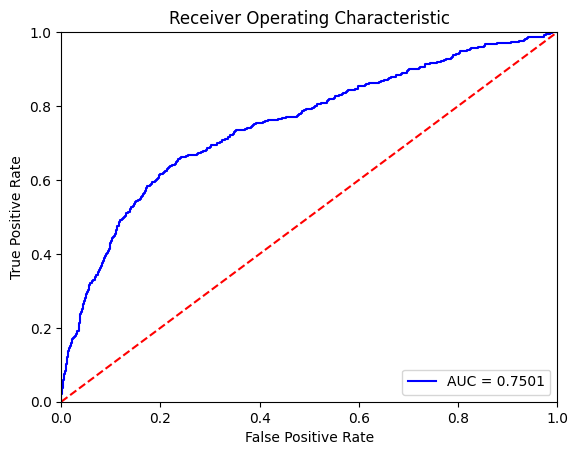

In [103]:
fpr, tpr, threshold = roc_curve(y, logit_mod.predict(sm.add_constant(X)))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred_probit = np.where(probit_mod.predict(sm.add_constant(X)) > 0.5, 1, 0)

In [107]:
pd.DataFrame(confusion_matrix(y_true = y, y_pred=y_pred_probit))

,0,1
0,2834,16
1,455,28


In [108]:
probit_conf = pd.DataFrame(confusion_matrix(y_true = y, y_pred=y_pred_probit))

Получается, confusion-matrix для пробит-модели выглядит вот так. Сразу посчитаю все остальные метрики


|             | y = 1| y = 0|
|-------------|------|------|
|$\hat{y}$ = 1|  TP = 2834  |  FP = 16 |
|$\hat{y}$ = 0|  FN = 455  |  TN = 28  |

- $Recall = \dfrac{TP}{TP + FN} = \dfrac{2834}{2834 + 455} = 0.861$
- $Precision = \dfrac{TP}{TP + FP} = \dfrac{2834}{2834 + 16} = 0.994$
- $F_1 = 2\cdot \dfrac{Precision \cdot Recall}{Precision + Recall} = 2\cdot \dfrac{0.861 \cdot 0.994}{0.861 + 0.994} = 0.461$

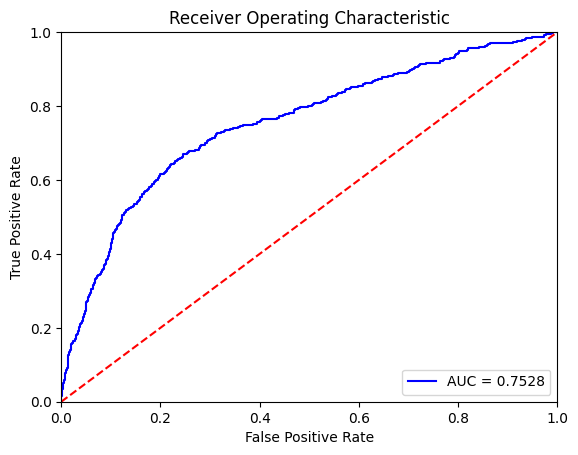

In [117]:
fpr, tpr, threshold = roc_curve(y, probit_mod.predict(sm.add_constant(X)))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Я бы ориентировалась на F1-score и AUC-ROC - эти метрики больше у пробит-модели

- Посмотреть на профиль среднего "клиента" (наблюдения). Какие переменные надо изменить, чтобы верояность ухода клиента снизилась?

Посмотрю на среднего клиента в рамках выбранной пробит-модели:

In [121]:
probit_mod.get_margeff(at = 'mean').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                              mean
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0791      0.013     -5.896      0.000      -0.105      -0.053
x2             0.0012      0.000     12.131      0.000       0.001       0.001
x3             0.0006      0.000      5.720      0.000       0.000       0.001
x4             0.0002      0.000      2.223      0.026    2.94e-05       0.000
x5             0.0486      0.004     12.799      0.000       0.041       0.056
==============================================================================
"""

Итак, при прочих равных, для среднего клиента:

- "Voice mail plan" - увеличение этой переменной (с 0 до 1), приводит к падению вероятности отказаться от компании на 7.9 п.п.
- "Total day minutes" - увеличение этой переменной на 1 минуту, приводит к увеличению вероятности отказаться от компании на 0.12 п.п.
- "Total eve minutes" - увеличение этой переменной на 1 минуту, приводит к увеличению вероятности отказаться от компании на 0.06 п.п.
- "Total night minutes" - увеличение этой переменной на 1 минуту, приводит к увеличению вероятности отказаться от компании на 0.02 п.п.
- "Customer service calls - увеличение этой переменной на 1 единицу, приводит к увеличению вероятности отказаться от компании на 4.86 п.п.

Получается, что для снижения вероятности ухода клиента, нужно сделать так, чтобы он реже звонил в поддержку и приобретал голосовую почту


- Перейдем к предсказаниям:
    - У вас не всегда будут функции типа `LogisticRegressionCV`, поэтому почитайте про [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
    - Подумайте, какие еще признаки можно добавить в вашу модель. На этом этапе не бойтесь кол-ва признаков, чем больше, тем лучше. *{Дополнительно: почитайте про [`RFECV`](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py), попробуйте его применить}*
    - При наличии достаточного кол-ва наблюдений, хорошей стратегией является использование только части данных для расчета модели. Используя [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) выделите наблюдения для обучения.
    - Создайте стратифицированные фолды на обучающей выборке
    - На практике нам приходится выбирать между различными метриками качества. В этой задаче будем использовать ROC AUC
    - Используя `GridSearchCV` и [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) подберите оптимальный гиперпараметр для l1, l2 регуляризаций. Помните, что вы хотите, чтобы оптимальный гиперпараметр был выбран согласно метрике ROC AUC. Почитайте, как это сделать в GridSearchCV
    - Нарисуйте графики, как меняется ваш score в зависимости от значения гиперпараметра

На этот раз включу в модель все признаки, кроме штата и кроме линейно зависимых друг от друга пар charge-time (оставлю только стоимость, так как именно на нее мы, как компания, можем влиять)

In [128]:
y = df[["Churn"]]

In [129]:
X = df[['Account length', 'International plan', 'Voice mail plan', 'Total day calls', 'Total day charge', 'Total eve calls', 'Total eve charge', 'Total night calls', 'Total night charge', 'Total intl calls', 'Total intl charge', 'Customer service calls']]

In [141]:
np.random.seed(123)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Для L-1 регуляризации: 
    (разные солверы включены, потому что, как оказалось, не все они в принципе подходят для L1 оптимизации)

In [155]:
parameters = {
    'penalty' : ['l1'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

In [156]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='roc_auc',        # metric for scoring
                   cv=4)                     # number of folds

In [157]:
clf.fit(X_train,y_train)

/home/kseniya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kseniya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kseniya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kseniya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='roc_auc')

In [158]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8057655470514375


In [178]:
param = clf.cv_results_['param_C'].data
roc_auc_score = clf.cv_results_['mean_test_score']

Text(0.5, 1.0, 'Значение roc-auc в зависимости от гиперпараметра')

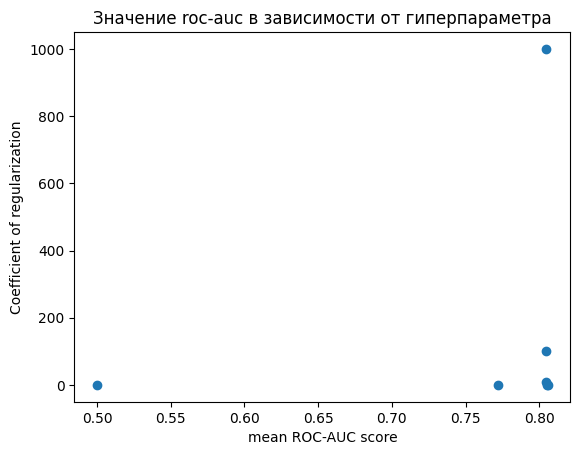

In [181]:
plt.scatter(roc_auc_score, param)
plt.ylabel('Coefficient of regularization')
plt.xlabel('mean ROC-AUC score')
plt.title("Значение roc-auc в зависимости от гиперпараметра")

Теперь для L-2 регуляризации

In [182]:
parameters = {
    'penalty' : ['l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

In [183]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='roc_auc',        # metric for scoring
                   cv=4)                     # number of folds

In [184]:
clf.fit(X_train,y_train)

/home/kseniya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kseniya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kseniya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kseniya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='roc_auc')

In [185]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8088261473185694


In [186]:
param = clf.cv_results_['param_C'].data
roc_auc_score = clf.cv_results_['mean_test_score']

Text(0.5, 1.0, 'Значение roc-auc в зависимости от гиперпараметра')

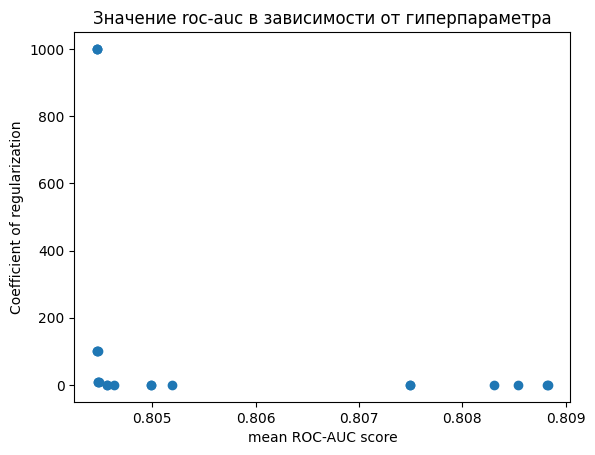

In [187]:
plt.scatter(roc_auc_score, param)
plt.ylabel('Coefficient of regularization')
plt.xlabel('mean ROC-AUC score')
plt.title("Значение roc-auc в зависимости от гиперпараметра")

# №3 (60 баллов)

- Ладно, пришла пора для чего более сложного
- В этой задаче вы сами все решаете. Более того, у вас будут даже чужие ноутбуки
- Если вы проведете такой же анализ, что и выше, то балл за это задание будет равен 10/40
- Чтобы получить максимальный балл за это задание, то вам нужно будет провести полноценное исследование

- Итак, представьте себе следующую ситуацию
- Вы участвуете в создании продукта/модели по предсказанию инсульта 
- Вы - главный аналитик, который отвечает за создание модели и презентацию ее результатов
- Проблема в том, что вы единственный аналитик в команде. Все остальные члены команды **не имеют математического бэкграунда, они не знают никаких моделей, они никогда не занимались программированием**. Они все медики.
- Вы знаете, что для тестривания модели на первом этапе подойдет [этот](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) замечательный датасет. Там есть примеры различного анализа и моделей
- Но вы не можете просто взять примеры оттуда:
    - Во-первых, ваша модель должна быть логистической или пробит 
    - Во-вторых, посмотрите на то, как меняется вероятность инсульта в зависимости от характеристик пациента
    - В-третьих, подумайте над тем, как можно поменять/улучшить эту модель, чтобы обеспечить **наилучшее предсказание**. Подумайте, какую метрику вы будете использовать для этой задачи. Обоснуйте выбор метрики.
- Еще важный момент. Вы отправите, получившееся исследование команде, поэтому оно не должно быть большим (время на прочтение и понимание того, что происходит, не должно занимать более 10-15 минут). Помните, что у команды есть и другие задачи, поэтому позаботьтесь, чтобы исследование было:
    - Структурированным. Можете использовать [классический](https://blogs.lse.ac.uk/impactofsocialsciences/2018/05/21/writing-a-page-turner-how-to-tell-a-story-in-your-scientific-paper/) подход к научному исследованию и добавить то, как делают [консультанты](https://strategyu.co/mckinsey-structured-problem-solving-secrets/)
    - Отвечало на поставленную задачу
    - Было самодостаточным (в одном jupyter файле, проще говоря)
    - Воспроизводимым (увижу, что явно не прописываете `seed`, если/где надо, поставлю 0 за это задание)
    - Было не стыдно показать другим людям (если графики будут без подписей осей и названия, как минимум, поставлю 0)